In [1]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import math
import seaborn as sns
%matplotlib inline
import xml.etree.ElementTree as et
import os

/Users/Xiaoqing/anaconda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
years = range(2010,2019)

In [3]:
pathstr = '/Users/Xiaoqing/Python/BootCamp/DataIncubator/NSF/'
frames = [pd.read_csv(pathstr+"NSF"+str(year)+".csv") for year in years]
NSFdata = pd.concat(frames, ignore_index=True)

In [4]:
NSFdata['year']=NSFdata['AwardEffectiveDate'].apply(lambda x: int(x[6:]))
NSF_phys = NSFdata[NSFdata['Directorate']=='Direct For Mathematical & Physical Scien']
NSF_mat = NSFdata[NSFdata['Division']=='Division Of Materials Research']

(2010, 2018)

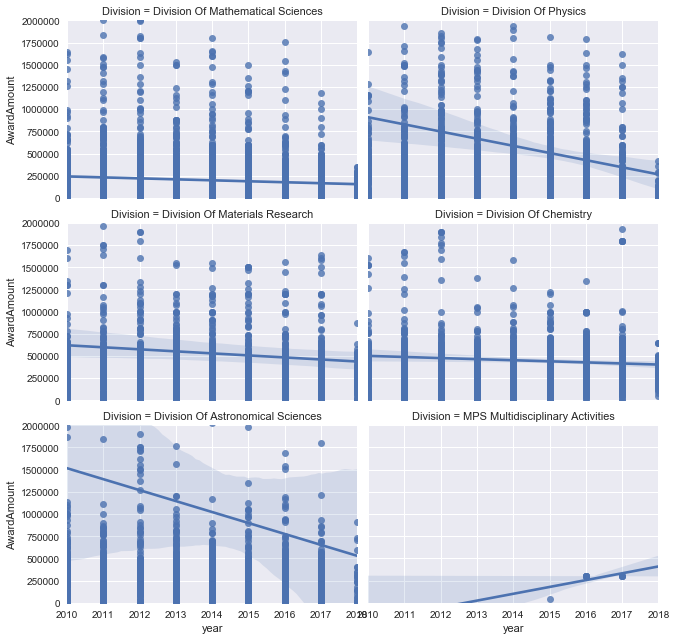

In [5]:
sns.lmplot(x = 'year', y = 'AwardAmount',col = 'Division', data = NSF_phys, col_wrap=2, size=3, aspect = 1.5)
sns.plt.ylim(0,2e6)
sns.plt.xlim(2010,2018)

In [28]:
NSF_physics = NSFdata[NSFdata['Division']=='Division Of Physics']

In [55]:
abstracts = "".join(NSF_mat['AbstractNarration'].dropna())

In [99]:
abstracts = abstracts.lower()

In [60]:
from wordcloud import WordCloud, STOPWORDS

In [130]:
stopwords= set(STOPWORDS)
new_stopwords=stopwords.union(new_words)
wc = WordCloud(stopwords=new_stopwords,background_color="white").generate(abstracts)

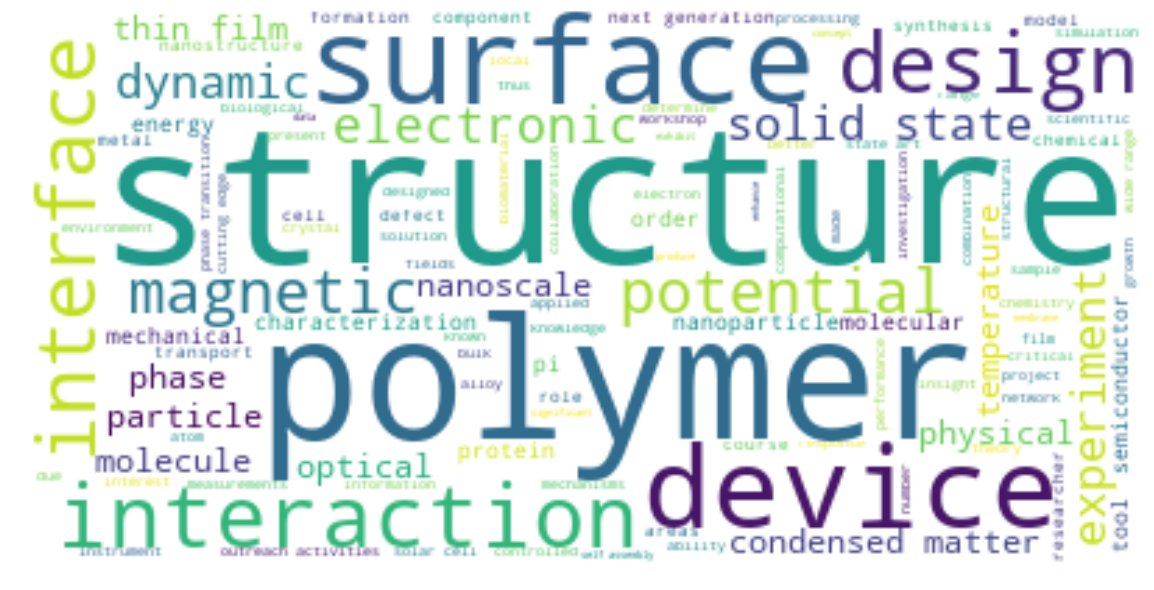

In [131]:
plt.figure(figsize = (20,20))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()